In [1]:
from lenslikelihood.power_spectra import *
structure_formation_interp_As = StructureFormationInterpLogc8Prior(ns_values, ar_values, ar2_values, 'As')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['xtick.major.width'] = 2.5
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.width'] = 2.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15

In [2]:
from lenslikelihood.measurements import *
from lenslikelihood.sampling import InterpolatedLikelihood
import dill as pickle
from trikde.pdfs import DensitySamples, IndepdendentLikelihoods, MultivariateNormalPriorHyperCube, CustomPriorHyperCube

nbins = 20
param_names = ['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index', 'sigma_sub']
param_ranges = [all_param_ranges_version2[name] for name in param_names]
load_from_pickle = True 
save_to_pickle = False 

filename_extension = '_joint_logprior'
base_path = './../lenslikelihood/precomputed_likelihoods/'
likelihoods = []
for lens in all_lens_names:
    fname = base_path + lens + filename_extension
    print('loading joint likelihoods for lens '+lens+' ...')
    f = open(fname, 'rb')
    single_lens_likelihood = pickle.load(f)
    f.close()
    likelihoods.append(single_lens_likelihood)
    
likelihood_noprior = IndepdendentLikelihoods(likelihoods)

loading joint likelihoods for lens WGDJ0405 ...
loading joint likelihoods for lens HE0435 ...
loading joint likelihoods for lens WGD2038 ...
loading joint likelihoods for lens B1422 ...
loading joint likelihoods for lens WFI2033 ...
loading joint likelihoods for lens PSJ1606 ...
loading joint likelihoods for lens WFI2026 ...
loading joint likelihoods for lens RXJ0911 ...
loading joint likelihoods for lens RXJ1131 ...
loading joint likelihoods for lens MG0414 ...
loading joint likelihoods for lens PG1115 ...


## Priors on the subhalo and field halo mass functions

A reasonable assumption to impose on the inference is that the number of subhalos varies proportionally with the number of field halos, since subhalos are accreted from the field. We can enforce this by choosing an expected amplitude for the subhalo mass function in $\Lambda$CDM, and then coupling variations to $\Sigma_{\rm{sub}}$ around this value to $\delta_{\rm{LOS}}$. 

In [3]:
def couple_mass_functions(samples, sigma_sub_theory=0.05, coupling_strength=0.1):
    
    delta_los_samples = samples[:, 0]
    sigma_sub_samples = samples[:, -1]
    delta_sigma_sub = sigma_sub_samples/sigma_sub_theory
    chi2 = (delta_sigma_sub - delta_los_samples)**2/coupling_strength**2 
    return chi2

sigma_sub_theory = 0.05
extrapolate_likelihood = True
kwargs_prior = {'sigma_sub_theory': sigma_sub_theory}
prior_on_mass_functions = CustomPriorHyperCube(couple_mass_functions, param_names, param_ranges, nbins, kwargs_prior)
likelihood = IndepdendentLikelihoods(likelihoods + [prior_on_mass_functions])
interpolated_lens_likelihood = InterpolatedLikelihood(likelihood, param_names, param_ranges, extrapolate=extrapolate_likelihood)

### Plot the likelihood

First we show the likelihood as inferred from the lenses with no additional modeling assumptions

[Text(0,0,'0.0'),
 Text(0,0,'0.025'),
 Text(0,0,'0.05'),
 Text(0,0,'0.075'),
 Text(0,0,'0.1')]

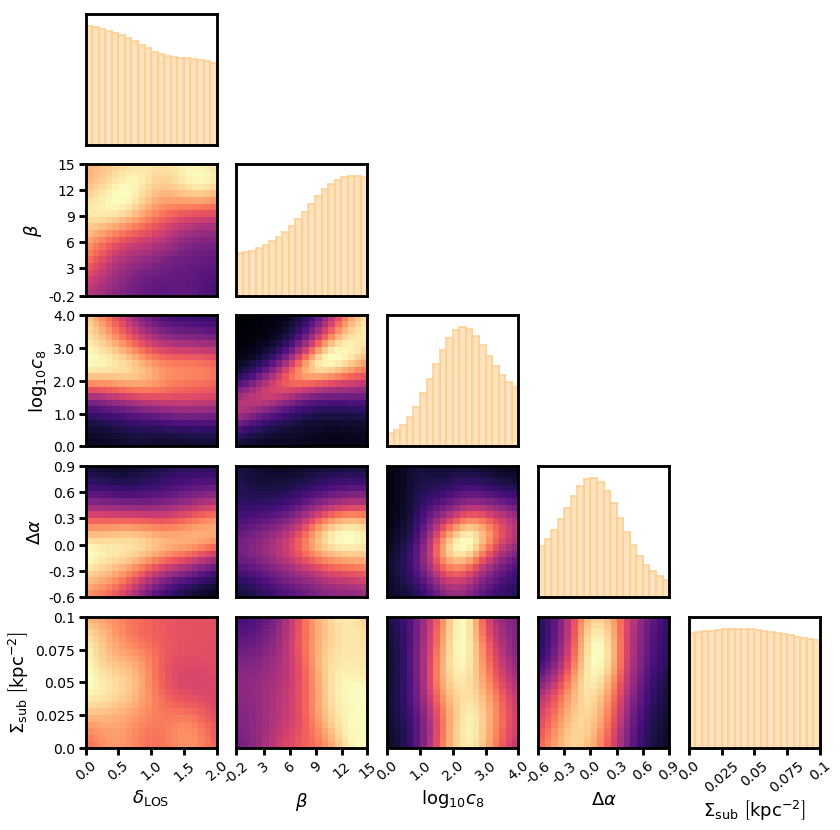

In [4]:
from trikde.triangleplot import TrianglePlot
triangle_plot = TrianglePlot([likelihood_noprior])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False
                                 )
beta = r'$\beta$'
beta_ticks = [-0.2, 3, 6, 9, 12, 15]
c0 = r'$\log_{10} c_8$'
c0_ticks = [0., 1.0, 2.0, 3.0, 4.0]
delta_power_law_index = r'$\Delta \alpha$'
dpli_ticks = [-0.6, -0.3, 0., 0.3, 0.6, 0.9]
sigma_sub = r'$\Sigma_{\rm{sub}} \ \left[\rm{kpc^{-2}}\right]$'
sigma_sub_ticks = [0., 0.025, 0.05, 0.075, 0.1]
delta_LOS = r'$\delta_{\rm{LOS}}$'
dlos_ticks = [0.0, 0.5, 1., 1.5, 2.]
ticksize = 14
labelsize = 18
rotation = 40

axes[5].set_ylabel(beta, fontsize=labelsize)
axes[5].set_yticks(beta_ticks)
axes[5].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[10].set_ylabel(c0, fontsize=labelsize)
axes[10].set_yticks(c0_ticks)
axes[10].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[15].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_yticks(dpli_ticks)
axes[15].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[20].set_ylabel(sigma_sub, fontsize=labelsize)
axes[20].set_yticks(sigma_sub_ticks)
axes[20].set_yticklabels(sigma_sub_ticks, fontsize=ticksize)

axes[20].set_xlabel(delta_LOS, fontsize=labelsize)
axes[20].set_xticks(dlos_ticks)
axes[20].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[21].set_xlabel(beta, fontsize=labelsize)
axes[21].set_xticks(beta_ticks)
axes[21].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[22].set_xlabel(c0, fontsize=labelsize)
axes[22].set_xticks(c0_ticks)
axes[22].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)


axes[23].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[23].set_xticks(dpli_ticks)
axes[23].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

axes[24].set_xlabel(sigma_sub, fontsize=labelsize)
axes[24].set_xticks(sigma_sub_ticks)
axes[24].set_xticklabels(sigma_sub_ticks, fontsize=ticksize, rotation=rotation)
# can change axis labels

### Likelihood with a prior

Now we show the likelihood after adding the prior coupling $\Sigma_{\rm{sub}}$ to $\delta_{LOS}$, assuming $\Sigma_{\rm{sub}} = 0.05 \rm{kpc^{-1}}$ in $\Lambda$CDM, corresponding to doubly efficient tidal disruption of halos between in the Milky Way relative to massive ellipticals

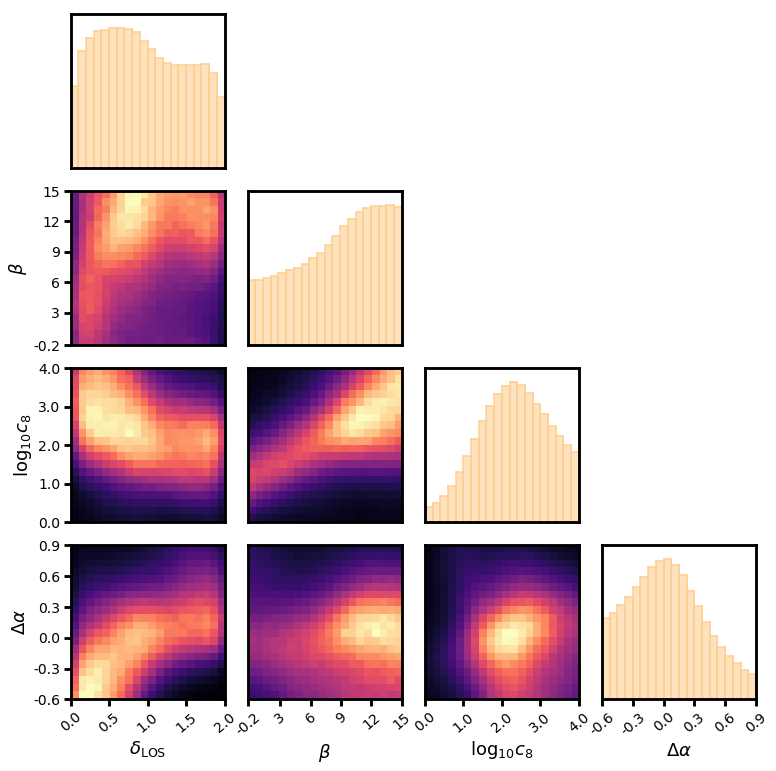

In [5]:
triangle_plot = TrianglePlot([likelihood])
triangle_plot.set_cmap('magma')
axes = triangle_plot.make_triplot(filled_contours=False, show_intervals=False, show_contours=False,
                                 display_params=['LOS_normalization', 'beta', 'log10c0', 'delta_power_law_index'])

axes[4].set_ylabel(beta, fontsize=labelsize)
axes[4].set_yticks(beta_ticks)
axes[4].set_yticklabels(beta_ticks, fontsize=ticksize)

axes[8].set_ylabel(c0, fontsize=labelsize)
axes[8].set_yticks(c0_ticks)
axes[8].set_yticklabels(c0_ticks, fontsize=ticksize)

axes[12].set_ylabel(delta_power_law_index, fontsize=labelsize)
axes[12].set_yticks(dpli_ticks)
axes[12].set_yticklabels(dpli_ticks, fontsize=ticksize)

axes[12].set_xlabel(delta_LOS, fontsize=labelsize)
axes[12].set_xticks(dlos_ticks)
axes[12].set_xticklabels(dlos_ticks, fontsize=ticksize, rotation=rotation)

axes[13].set_xlabel(beta, fontsize=labelsize)
axes[13].set_xticks(beta_ticks)
axes[13].set_xticklabels(beta_ticks, fontsize=ticksize, rotation=rotation)

axes[14].set_xlabel(c0, fontsize=labelsize)
axes[14].set_xticks(c0_ticks)
axes[14].set_xticklabels(c0_ticks, fontsize=ticksize, rotation=rotation)

axes[15].set_xlabel(delta_power_law_index, fontsize=labelsize)
axes[15].set_xticks(dpli_ticks)
axes[15].set_xticklabels(dpli_ticks, fontsize=ticksize, rotation=rotation)

plt.savefig('./figures/lensing_likelihood_logprior.pdf')

## Systematic modeling errors

We allow for systematic errors in the model by changing the internal mapping between the parameters describing the mass function and concentration-mass relation

In [6]:
f = open('systematic_error_interpolation_lowfit', 'rb')
systematic_interp_lowfit = pickle.load(f)
f.close()

f = open('systematic_error_interpolation_highfit', 'rb')
systematic_interp_highfit = pickle.load(f)
f.close()

## Final setup

In [7]:
param_ranges_pk = [[0.93, 1.], [-0.1, 0.1], [-0.01, 0.01]]
delta_los_range = [0., 2.]
beta_range = [-0.2, 15.]
log10c0_range = [0., 4.25]
delta_alpha_range = [-0.6, 0.9]
sigma_sub_range = [0., 0.1]
param_ranges_lensing = [delta_los_range, beta_range, log10c0_range, delta_alpha_range, sigma_sub_range]
n_draw = 200000
extrapolate_ranges = [[0., 2.], 
                     [-0.2, 15.],
                     [0., 4.], 
                     delta_alpha_range,
                     sigma_sub_range]

## Compute the likelihood of the power spectrum parameters

We can compute the likelihood the parameters describing $P\left(k\right)$, adding systematic models errors by hand

In [8]:
samples_sys1, like_sys1 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

samples_sys2, like_sys2 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_highfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

samples_no_sys, like_no_sys = sample_power_spectra(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, 
                                                   interpolated_lens_likelihood, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges)

samples_sys_noamp_1, like_sys_noamp_1 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, log10c8_sys=False, delta_los_sys=False)

samples_sys_noamp_2, like_sys_noamp_2 = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_highfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, log10c8_sys=False, delta_los_sys=False)

samples_sys_noslope, like_sys_noslope = sample_power_spectra_with_systematic_interp(n_draw, param_ranges_pk, param_ranges_lensing, structure_formation_interp_As, interpolated_lens_likelihood,
                                    systematic_interp_lowfit, extrapolate=extrapolate_likelihood, extrapolate_ranges=extrapolate_ranges, delta_alpha_sys=False, beta_sys=False)

## Plot the likelihood of the parameters describing the power spectrum

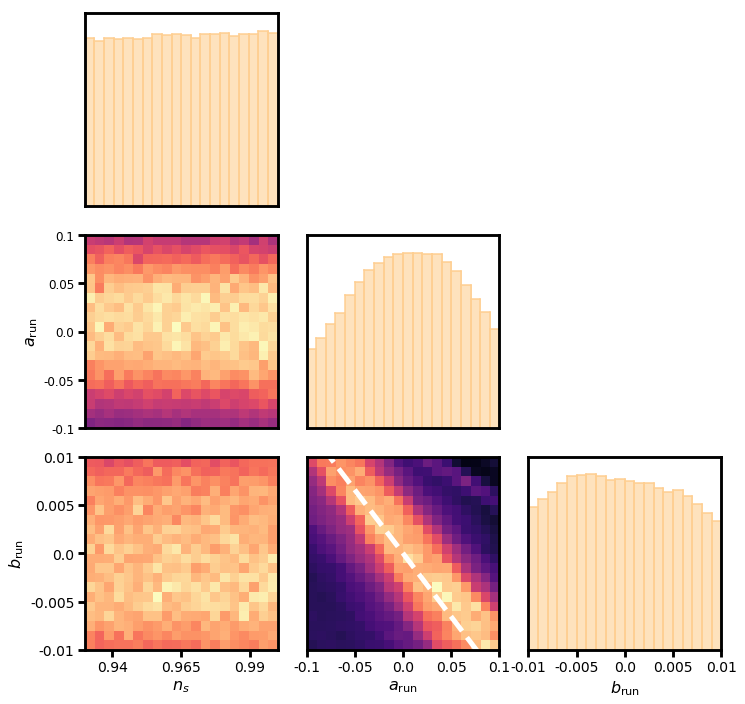

In [21]:
def line_of_constant_power(pranges_arun, k, k0=0.05):
    
    arun = np.linspace(pranges_arun[0], pranges_arun[1], 100)
    y = -arun * np.log(k/k0) / np.log(k/k0)**2
    return arun, y

nbins = 20
param_names_pk = [r'$n_s$', r'$a_{\rm{run}}$', r'$b_{\rm{run}}$'] 

samples_marginalized = np.vstack((np.vstack((np.vstack((np.vstack((np.vstack((samples_no_sys, samples_sys1)), samples_sys2)), samples_sys_noamp_1)), samples_sys_noamp_2)), samples_sys_noslope))
likelihood_marginalized = np.append(np.append(np.append(np.append(np.append(like_no_sys, like_sys1), like_sys2), like_sys_noamp_1), like_sys_noamp_2), like_sys_noslope)

density_marginalized = DensitySamples(samples_marginalized, param_names_pk, likelihood_marginalized, 
                                 param_ranges_pk, nbins=nbins, use_kde=False, bandwidth_scale=1.)
pk_likelihood_marginalized = IndepdendentLikelihoods([density_marginalized])

triplot = TrianglePlot([pk_likelihood_marginalized])
triplot.set_cmap('magma')
axes = triplot.make_triplot(filled_contours=False, show_contours=False, show_intervals=False)

x, constant_power_line = line_of_constant_power(param_ranges_pk[1], 100)
axes[7].plot(x, constant_power_line, color='w', lw=5, linestyle='--')

arun_ticks = [-0.10, -0.05, 0.00, 0.05, 0.10]
brun_ticks = [-0.010, -0.005, 0.000, 0.005, 0.01]
ns_ticks = [0.940, 0.965, 0.990]
axes[3].set_yticks(arun_ticks)
axes[3].set_yticklabels(arun_ticks)

axes[6].set_yticks(brun_ticks)
axes[6].set_yticklabels(brun_ticks, fontsize=ticksize)

axes[6].set_xticks(ns_ticks)
axes[6].set_xticklabels(ns_ticks, fontsize=ticksize)

axes[7].set_xticks(arun_ticks)
axes[7].set_xticklabels(arun_ticks, fontsize=ticksize)

axes[8].set_xticks(brun_ticks)
axes[8].set_xticklabels(brun_ticks, fontsize=ticksize)

plt.savefig('./figures/qP_likelihood_sigmasub5_logprior.pdf')

### Priors on running and running-of-running

We can add a prior to either $a_{\rm{run}}$ and $b_{\rm{run}}$ to break the degeneracy and constrain them one at a time

[Text(0,0,'-0.01'),
 Text(0,0,'-0.005'),
 Text(0,0,'0.0'),
 Text(0,0,'0.005'),
 Text(0,0,'0.01')]

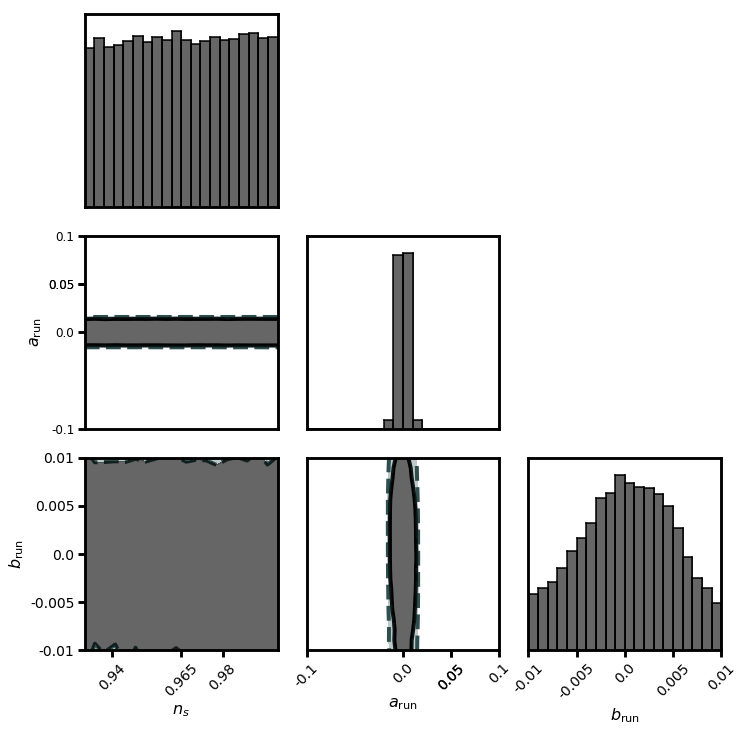

In [19]:
def prior_on_arun(samples, arun_mean=0.0, arun_sigma=0.005):
    
    arun_samples = samples[:, 1]
    chi2 = (arun_samples - arun_mean)**2/arun_sigma**2 
    return chi2

def prior_on_brun(samples, brun_mean=0.0, brun_sigma=0.0005):
    
    brun_samples = samples[:, 2]
    chi2 = (brun_samples - brun_mean)**2/brun_sigma**2 
    return chi2

prior_on_arun = CustomPriorHyperCube(prior_on_arun, param_names_pk, param_ranges_pk, nbins)
likelihood_with_arunprior = IndepdendentLikelihoods([density_marginalized, prior_on_arun])

prior_on_brun = CustomPriorHyperCube(prior_on_brun, param_names_pk, param_ranges_pk, nbins)
likelihood_with_brunprior = IndepdendentLikelihoods([density_marginalized, prior_on_brun])

triplot = TrianglePlot([likelihood_with_arunprior])
triplot.set_cmap('magma')
axes = triplot.make_triplot(filled_contours=True, show_contours=False, show_intervals=False)

axes[3].set_yticks(arun_ticks)
axes[3].set_yticklabels(arun_ticks)

axes[6].set_yticks(brun_ticks)
axes[6].set_yticklabels(brun_ticks, fontsize=ticksize)

axes[6].set_xticks(ns_ticks)
axes[6].set_xticklabels(ns_ticks, fontsize=ticksize, rotation=45)

axes[7].set_xticks(arun_ticks)
axes[7].set_xticklabels(arun_ticks, fontsize=ticksize, rotation=45)

axes[8].set_xticks(brun_ticks)
axes[8].set_xticklabels(brun_ticks, fontsize=ticksize, rotation=45)

## Compute the likelihood, prior, and posterior distribution of $P_{100}$

First, with no modeling systematics

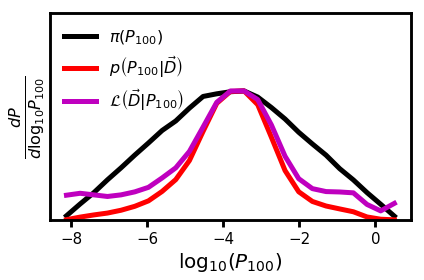

In [22]:
from colossus.cosmology.power_spectrum import transferFunction
from trikde.triangleplot import compute_confidence_intervals
from scipy.interpolate import interp1d

pk_no_sys, p100_likelihood_no_sys, x, prior_no_sys, posterior_no_sys = P100_from_likelihood(samples_no_sys, like_no_sys)
pk_sys1, p100_likelihood_sys1, x, _, posterior_sys1 = P100_from_likelihood(samples_sys1, like_sys1)
pk_sys2, p100_likelihood_sys2, x, _, posterior_sys2 = P100_from_likelihood(samples_sys2, like_sys2)
pk_sys_noamp_1, p100_likelihood_sys_noamp_1, x, _, posterior_sys_noamp_1 = P100_from_likelihood(samples_sys_noamp_1, like_sys_noamp_1)
pk_sys_noamp_2, p100_likelihood_sys_noamp_2, x, _, posterior_sys_noamp_2 = P100_from_likelihood(samples_sys_noamp_2, like_sys_noamp_2)
pk_sys_noslope, p100_likelihood_sys_noslope, x, _, posterior_sys_noslope = P100_from_likelihood(samples_sys_noslope, like_sys_noslope)

fig = plt.figure(1)
fig.set_size_inches(6,4)
ax = plt.subplot(111)

total_posterior = posterior_no_sys + posterior_sys1 + posterior_sys2 + posterior_sys_noamp_1 + posterior_sys_noamp_2 + posterior_sys_noslope
total_posterior *= np.max(total_posterior) ** -1

total_likelihood = p100_likelihood_no_sys + p100_likelihood_sys1 + p100_likelihood_sys2 + p100_likelihood_sys_noamp_1 + p100_likelihood_sys_noamp_2 + p100_likelihood_sys_noslope
total_likelihood *= np.max(total_likelihood) ** -1

ax.plot(x, prior_no_sys, color='k', lw=5, label=r'$\pi\left(P_{100}\right)$')
ax.plot(x, total_posterior, color='r', lw=5, label=r'$p\left(P_{100} | \vec{D}\right)$')
ax.plot(x, total_likelihood, color='m', lw=5, label=r'$\mathcal{L}\left(\vec{D} | P_{100}\right)$')
ax.legend(fontsize=16, loc=2, frameon=False)

ax.set_yticklabels('off')
ax.set_yticks([])
ax.set_xlabel(r'$\log_{10}\left(P_{100}\right)$', fontsize=20)
ax.set_ylabel(r'$\frac{d P}{d \log_{10} P_{100}}$', fontsize=23)
ax.set_ylim(0, 1.6)

plt.tight_layout()
plt.savefig('./figures/likelihood_prior_posterior_sigmasub5_logprior.pdf')

## Now including systematics

Now add the modeling systematics, and compute the final likelihood by averaging over the differnt PDFs

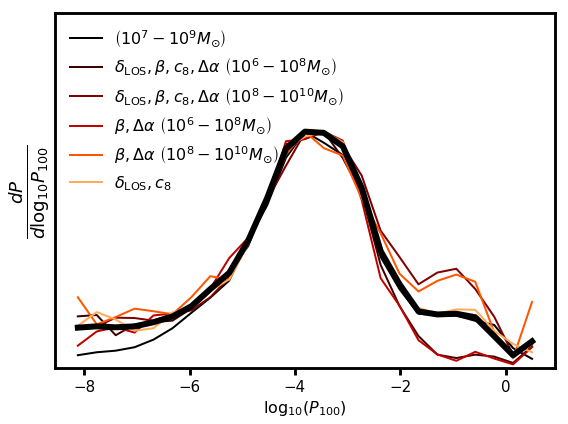

In [12]:
from matplotlib.cm import get_cmap

cmap = get_cmap('gist_heat')

fig = plt.figure(1)
fig.set_size_inches(8,6)
ax = plt.subplot(111)

combinations = [p100_likelihood_no_sys, p100_likelihood_sys1, p100_likelihood_sys2, p100_likelihood_sys_noamp_1, 
                p100_likelihood_sys_noamp_2, p100_likelihood_sys_noslope]

mid_range = r'$\left(10^7 - 10^{9} M_{\odot}\right)$'
low_range = r'$\left(10^6 - 10^{8} M_{\odot}\right)$'
high_range = r'$\left(10^8 - 10^{10} M_{\odot}\right)$'
lab = [mid_range, 
       r'$\delta_{\rm{LOS}}, \beta, c_8, \Delta \alpha \ $'+low_range,
      r'$\delta_{\rm{LOS}}, \beta, c_8, \Delta \alpha \ $'+high_range,
      r'$\beta, \Delta \alpha \ $'+low_range,
      r'$\beta, \Delta \alpha \ $'+high_range,
      r'$\delta_{\rm{LOS}}, c_8 \ $']
color_norm = len(combinations)
total = np.zeros_like(combinations[0])


for i in range(0, len(combinations)):
    total += combinations[i]
    ax.plot(x, combinations[i], color=cmap(i/color_norm), label=lab[i], lw=2.)

ax.set_yticklabels('off')
ax.set_yticks([])
ax.set_xlabel(r'$\log_{10}\left(P_{100}\right)$', fontsize=16)
ax.set_ylabel(r'$\frac{d P}{d \log_{10} P_{100}}$', fontsize=26)
ax.set_ylim(0, 1.5)
#ax.annotate('Fitting range:', xy=(0.65, 0.93), xycoords='axes fraction', fontsize=18)
ax.legend(fontsize=16, frameon=False, loc=2)
total *= np.max(total) ** -1
ax.plot(x, total, color='k', lw=6)

total_interp = interp1d(x, total)
samples_from_total = []
while len(samples_from_total) < 2000:
    u = np.random.rand()
    xi = np.random.uniform(x[0], x[-1])
    p = total_interp(xi)
    if p > u:
        samples_from_total.append(xi)

samples_from_total = np.array(samples_from_total)

plt.tight_layout()
plt.savefig('./figures/final_likelihood_sigmasub5_logprior.pdf')

In [13]:
def load_existing_measurements():
    datasets_xyerror = ['DES','PlanckTT', 'PlanckEE', 'PlanckPP']
    datasets_yerror = ['lymanalpha', 'SDSS']
    
    kvalues, pks, xerrs, yerrs = [], [], [], []
    for dset in datasets_xyerror:  
        
        k = np.loadtxt('./existing_PK_measurements/'+dset+'_kvalues.txt')
        pk = np.loadtxt('./existing_PK_measurements/'+dset + '_pk.txt')
        xerr = np.loadtxt('./existing_PK_measurements/'+dset + '_xerr.txt')
        yerr = np.loadtxt('./existing_PK_measurements/'+dset + '_yerr.txt')
        kvalues.append(k)
        pks.append(pk)
        xerrs.append(xerr)
        yerrs.append(yerr)
        
    kvalues_yerr, pks_yerr, yerrs_only = [], [], []
    for dset in datasets_yerror:  
        k = np.loadtxt('./existing_PK_measurements/'+dset+'_kvalues.txt')
        pk = np.loadtxt('./existing_PK_measurements/'+dset + '_pk.txt')
        yerr = np.loadtxt('./existing_PK_measurements/'+dset + '_yerr.txt')
        kvalues_yerr.append(k)
        pks_yerr.append(pk)
        yerrs_only.append(yerr)
    
    return datasets_xyerror + datasets_yerror, kvalues, pks, xerrs, yerrs, kvalues_yerr, pks_yerr, yerrs_only
    
names, kvalues, power_spectra, xerrors, yerrors, kvalues_no_x_error, power_spectra_noxerror, yerrors_no_x_error = load_existing_measurements()

cmap_planck = get_cmap('gist_heat')
cmap_other = get_cmap('Blues')

colors = {'DES': 'dodgerblue', 'PlanckEE': 'teal', 'PlanckTT': 'k', 'PlanckPP': 'maroon', 'lymanalpha': 'r', 'SDSS': 'darkorange'}
colors = {'DES': cmap_other(0.9), 'PlanckEE': cmap_planck(0.85), 'PlanckTT': cmap_planck(0.35), 'PlanckPP': cmap_planck(0.6), 
          'lymanalpha': 'k', 'SDSS': cmap_other(0.4)}

zorders = {'DES': 6, 'PlanckEE': 2, 'PlanckTT': 1, 'PlanckPP': 2, 'lymanalpha': 5, 'SDSS': 1}
labels = {'DES': 'DES Y1 cosmic shear', 'PlanckEE': 'Planck 2018 EE', 'PlanckTT': 'Planck 2018 TT', 
          'PlanckPP': 'Planck 2018 PP', 'lymanalpha': r'$\rm{Lyman-}\alpha$', 'SDSS': 'SDSS DR7 LRG'}
theory_k = np.loadtxt('./existing_PK_measurements/theory_kvalues.txt')
theory_pk = np.loadtxt('./existing_PK_measurements/theory_pk.txt')

theory_log10pk_interp = interp1d(np.log10(theory_k), np.log10(theory_pk), bounds_error=False, fill_value='extrapolate')

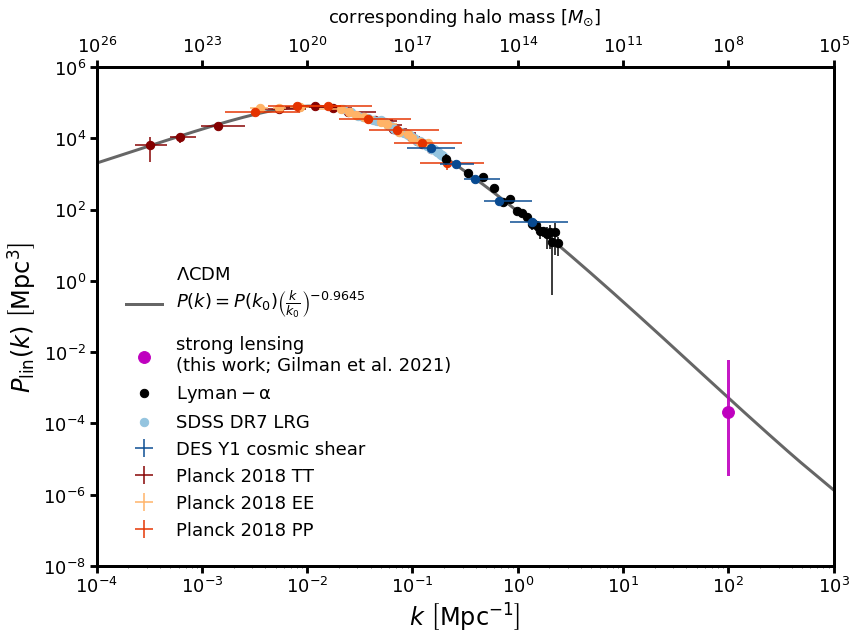

In [14]:
plt.clf()
fig = plt.figure(1)
fig.set_size_inches(12, 9)
ax = plt.subplot(111)
 
pk_at_point = 10**samples_from_total

mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(pk_at_point, 1)
pk_lower_68 = mu - mu_minus_lower
pk_upper_68 = upper_minus_mu - mu

mu, [mu_minus_lower, upper_minus_mu] = compute_confidence_intervals(pk_at_point, 2)
pk_lower_95 = mu - mu_minus_lower
pk_upper_95 = upper_minus_mu - mu

k_theory = np.logspace(-4.5, 4, 4000)
Lcdm_label = r'$\Lambda \rm{CDM}$' + '\n'+r'$P\left(k\right) = P\left(k_0\right) \left(\frac{k}{k_0}\right)^{-0.9645}$'
ax.plot(k_theory , 10**theory_log10pk_interp(np.log10(k_theory)), color='0.4', lw=3, label=Lcdm_label, zorder=0)

markersize = 70
markersize_lensing = 140
marker_lensing = 'o'
color_lensing = 'm'
alpha = 1.
    
ax.scatter(100, mu, color=color_lensing, marker=marker_lensing, s=markersize_lensing, label='strong lensing\n(this work; Gilman et al. 2021)', alpha=1.)
ax.plot([100, 100], [pk_lower_68, pk_upper_68], color=color_lensing, lw=3, alpha=0.9, zorder=20)

ii = 0
for _, (k, pk, xerr, yerr) in enumerate(zip(kvalues, power_spectra, xerrors, yerrors)):
    
    label = labels[names[ii]]
    try:
        ax.errorbar(k, pk, xerr=xerr, yerr=yerr, fmt='none', color=colors[names[ii]],
               label=label, zorder=zorders[names[ii]], alpha=alpha)
    except:
        ax.errorbar(k, pk, xerr=xerr.T, yerr=yerr, fmt='none', color=colors[names[ii]],
               label=label, zorder=zorders[names[ii]], alpha=alpha)
    ax.scatter(k, pk, color=colors[names[ii]], s=markersize, zorder=zorders[names[ii]], alpha=alpha)
    ii += 1
    
for _, (k, pk, yerr) in enumerate(zip(kvalues_no_x_error, power_spectra_noxerror, yerrors_no_x_error)):
    
    label = labels[names[ii]]
    
    try:
        ax.errorbar(k, pk, yerr=yerr, fmt='none', color=colors[names[ii]],zorder=zorders[names[ii]], alpha=alpha)
    except:
        ax.errorbar(k, pk, yerr=yerr.T, fmt='none', color=colors[names[ii]],zorder=zorders[names[ii]], alpha=alpha)
        
    ax.scatter(k, pk, color=colors[names[ii]], label=label, s=markersize, zorder=zorders[names[ii]],
              alpha=alpha)
    ii += 1
    
ax.set_xlabel(r'$k \ \left[\rm{Mpc^{-1}}\right]$', fontsize=24)
ax.set_ylabel(r'$P_{\rm{lin}}(k) \ \left[\rm{Mpc}^3\right]$', fontsize=24)

xticks = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
ax.set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])
ax.set_xticklabels([r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$', r'$10^{3}$'],
                  fontsize=18)
ax.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2,1e4])
ax.set_yticklabels([r'$10^{-10}$', r'$10^{-8}$', r'$10^{-6}$', r'$10^{-4}$', r'$10^{-2}$', r'$10^{0}$', r'$10^{2}$', r'$10^{4}$'],
                  fontsize=18)

ax_upper = ax.twiny()
rhocrit = 2.7754e+11 * kwargs_cosmo['Om0']

h = 0.69
xmin, xmax = 0.0001, 10**3
x_values = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1., 1e1, 1e2, 1e3])
upper_xticks = np.round(np.log10((4/3) * np.pi * rhocrit * (2 * np.pi / x_values) ** 3), 2) / h

upper_xticklocs = np.linspace(0, 1, 8)
ax_upper.set_xticks(upper_xticklocs)
ax_upper.set_xticklabels([r'$10^{26}$', 
                         r'$10^{23}$',
                         r'$10^{20}$',
                         r'$10^{17}$',
                         r'$10^{14}$',
                         r'$10^{11}$',
                         r'$10^{8}$',
                         r'$10^{5}$'], fontsize=18)
ax_upper.set_xlabel('corresponding halo mass '+r'$\left[M_{\odot}\right]$', fontsize=labelsize, labelpad=14)

ax.set_ylim(10**-8, 10**6)
ax.set_xlim(xmin, xmax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(fontsize=18, frameon=False, loc=(0.03, 0.04))

plt.tight_layout()
plt.savefig('./figures/power_spectrum_inference_sigmasub5_logprior.pdf')

In [15]:
print('log10(P_100) = ', np.log10(mu))
print('plus: ', -np.log10(mu) + np.log10(pk_upper_68))
print('minus: ', np.log10(mu) - np.log10(pk_lower_68))

log10(P_100) =  -3.682347158989721
plus:  1.4266811178396175
minus:  1.7350740226106023
